In [2]:
import xgcm
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.colors import LogNorm
import gsw
from scipy import signal
import cmocean.cm as cmo
import xarray as xr
import datetime
xr.set_options(keep_attrs=True)
plt.rcParams['font.size']=16

In [6]:
## path to the stored data
path=('home/birte/MAUD_RISE_config/maud/m36_ke2/cor/')
# locations for Taylor Cap and Halo
xloc_tc36=268
yloc_tc36=553
yloc_ha36=643

# extract and save the necessary denisty timeseries for the plot
ds5=xr.open_mfdataset('home/birte/MAUD_RISE_config/maud_v4/m36_ke2/sig0*.nc')
s6_o=ds5.sig0_l2.isel(y_c=450,x_c=650).load()
s1_r=ds36.sig0_l2.isel(y_c=yloc_tc36+3,x_c=505).load()
s2_g=ds36.sig0_l2.isel(y_c=yloc_tc36+3,x_c=xloc_tc36).load()
s3_b=ds36.sig0_l2.isel(y_c=yloc_tc36+3,x_c=721).load()
s4_y=ds36.sig0_l2.isel(y_c=yloc_tc36+3,x_c=181).load()
s5_k=ds36.sig0_l2.isel(y_c=yloc_ha36,x_c=xloc_tc36).load()

s1_r=s1_r.rename("s1_r")
s2_g=s2_g.rename("s2_g")
s3_b=s3_b.rename("s3_b")
s4_y=s4_y.rename("s4_y")
s5_k=s5_k.rename("s5_k")
s6_o=s6_o.rename("s6_o")
s1_r.to_netcdf(path+'s1_r.nc')
s2_g.to_netcdf(path+'s2_g.nc')
s3_b.to_netcdf(path+'s3_b.nc')
s4_y.to_netcdf(path+'s4_y.nc')
s5_k.to_netcdf(path+'s5_k.nc')
s6_o.to_netcdf(path+'s6_o.nc')

OSError: no files to open

In [25]:
years = np.arange(2007,2018)


minor_ticks = []
for y in years:
    minor_ticks += [datetime.datetime(y,m,1) for m in range(1,13)]


In [22]:
# load correlated data
path=('/home/birte/MAUD_RISE_config/maud_v4/m36_ke2/cor/')
ds1=xr.open_mfdataset(path+'cor4*_10d_rolled.nc')
bat=xr.open_dataset('/home/birte/MAUD_RISE_config/maud_v4/m36_mask/1_domain_cfg_50levels_new.nc')
bat.coords['nav_lon']=bat.nav_lon.mean(dim='y')
bat.coords['nav_lat']=bat.nav_lat.mean(dim='x')
bat=bat.swap_dims({'x':'x_c','y':'y_c'})
ds=xr.merge((ds1,bat.bathy_meter))


del ds['nav_lon']
del ds['nav_lat']
ds36=ds
# density time series
ds3s=xr.open_mfdataset(path+'/sig0_plot_data/s*_*.nc',compat='override')
time_array36=np.array(ds3s.t,dtype=np.datetime64)

grid36 = xgcm.Grid(ds36, coords={"X": {"center": "x_c", "right": "x_f"},"Y": {"center": "y_c", "right": "y_f"},"T":{"center":"t"},"Z":{"center":"z_c", "left":"z_f"}})
ds36

<xarray.Dataset>
Dimensions:      (x_c: 879, y_c: 804)
Coordinates:
  * x_c          (x_c) int64 0 1 2 3 4 5 6 7 ... 871 872 873 874 875 876 877 878
  * y_c          (y_c) int64 0 1 2 3 4 5 6 7 ... 796 797 798 799 800 801 802 803
    glamt        (y_c, x_c) float64 dask.array<chunksize=(804, 879), meta=np.ndarray>
    gphit        (y_c, x_c) float64 dask.array<chunksize=(804, 879), meta=np.ndarray>
Data variables:
    cor4         (y_c, x_c) float64 dask.array<chunksize=(804, 879), meta=np.ndarray>
    maxcor4      (y_c, x_c) float64 dask.array<chunksize=(804, 879), meta=np.ndarray>
    timelag4     (y_c, x_c) int64 dask.array<chunksize=(804, 879), meta=np.ndarray>
    bathy_meter  (y_c, x_c) float32 ...

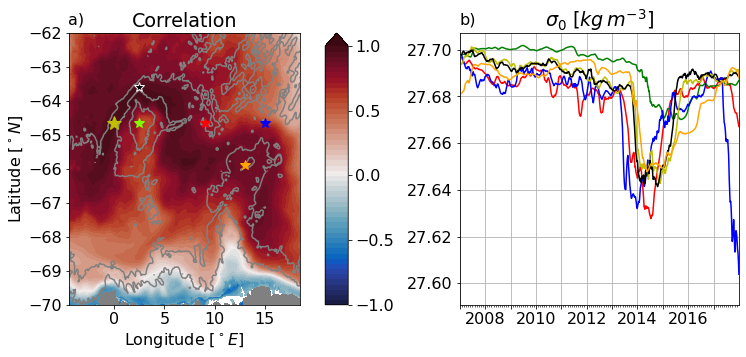

In [32]:
# Figure ( of the manuscript)
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec


fig = plt.figure(figsize=(12,5))
gs = GridSpec(1,2, width_ratios=[1,1],wspace=.4)#,wspace=0.3)
gs1 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1], width_ratios=[1])
gs2 = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0], width_ratios=[1,.1])

den_ax = fig.add_subplot(gs1[0,0])
cor_ax = fig.add_subplot(gs2[0,0])
cor_cax= fig.add_subplot(gs2[0,1])

ax=den_ax
ds3s.s1_r.rolling(t=51,center=True).mean().plot(ax=ax,color='r')
ds3s.s2_g.rolling(t=51,center=True).mean().plot(ax=ax,color='g')
ds3s.s3_b.rolling(t=51,center=True).mean().plot(ax=ax,color='b')
ds3s.s4_y.rolling(t=51,center=True).mean().plot(ax=ax,color='y')
ds3s.s5_k.rolling(t=51,center=True).mean().plot(ax=ax,color='k')
ds3s.s6_o.rolling(t=51,center=True).mean().plot(ax=ax,color='orange')
ax.grid()
ax.text(0.03, 1.05, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='16')
ax.set_title('$\\sigma_0$ [$kg\,m^{-3}$]')
plt.setp(ax.get_xticklabels(), ha="center", rotation=0)
ax=cor_ax
cc=ds36.cor4.plot.pcolormesh(x="glamt",y="gphit",ax=ax,vmin=-1,vmax=1,levels=51,cmap=cmo.balance,add_colorbar=False)#cbar_kwargs={'label':''})
ds36.bathy_meter.plot.contour(x="glamt",y="gphit",ax=ax,levels=[2500,3500,5000],colors='grey')
ds36.bathy_meter.where(ds36.bathy_meter<1).plot.contourf(x="glamt",y="gphit",ax=ax,colors='gray',add_colorbar=False)
ax.text(0.03, 1.05, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='16')
ax.set_title('Correlation')
ax.plot(ds36.glamt.isel(y_c=yloc_tc36+3,x_c=505),ds36.gphit.isel(y_c=yloc_tc36+3,x_c=505),color='r',marker='*',markersize=10)
ax.plot(ds36.glamt.isel(y_c=yloc_tc36+3,x_c=xloc_tc36),ds36.gphit.isel(y_c=yloc_tc36+3,x_c=xloc_tc36),color='chartreuse',marker='*',markersize=10)
ax.plot(ds36.glamt.isel(y_c=yloc_tc36+3,x_c=721),ds36.gphit.isel(y_c=yloc_tc36+3,x_c=721),color='b',marker='*',markersize=10)
ax.plot(ds36.glamt.isel(y_c=yloc_tc36+3,x_c=181),ds36.gphit.isel(y_c=yloc_tc36+3,x_c=181),color='y',marker='*',markersize=14)
ax.plot(ds36.glamt.isel(y_c=yloc_ha36,x_c=xloc_tc36),ds36.gphit.isel(y_c=yloc_ha36,x_c=xloc_tc36),color='k',marker='*',markersize=10,markeredgecolor='w')
ax.plot(ds36.glamt.isel(y_c=450,x_c=650),ds36.gphit.isel(y_c=450,x_c=650),color='orange',marker='*',markersize=10)

#colorbar
plt.colorbar(cc,cax=cor_cax,ticks=np.arange(-1,1.1,0.5))


cor_ax.set_xlabel('Longitude [$^\circ E$]')
den_ax.set_xlabel('')
cor_ax.set_ylabel('Latitude [$^\circ N$]')
den_ax.set_ylabel('')

cor_ax.set_xlim((-4.5,18.5))
cor_ax.set_xticks(np.arange(0,20,5))
den_ax.set_xlim((time_array36[26],time_array36[-163]))
den_ax.set_xticks([datetime.datetime(i,1,1) for i in years[1::2]])
den_ax.set_xticklabels(years[1::2])
den_ax.set_xticks([datetime.datetime(i,1,1) for i in years])
den_ax.set_xticks(minor_ticks, minor=True);
#den_ax.set_xticklabels(['','2008','','2010','','2012','','2014','','2016',''])
cor_ax.set_ylim(-70,-62)


plt.savefig('./correlation_sig0_m36.jpg',dpi=300)